### SETUP

In [1]:
# --- CELLA 1: SETUP E CARICAMENTO ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

# Impostazioni standard per i grafici
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7) # Dimensioni standard per i grafici singoli
warnings.filterwarnings('ignore', category=FutureWarning) # Ignora avvisi futuri di Seaborn

# Carica i dati puliti (il nostro punto di partenza)
try:
    df_movimento = pd.read_csv('movimento_puliti.csv')
    df_portieri = pd.read_csv('portieri_puliti.csv')
    
    print("--- Dati Caricati Correttamente ---")
    print(f"Giocatori di Movimento: {df_movimento.shape}")
    print(f"Portieri: {df_portieri.shape}")

except FileNotFoundError:
    print("--- ERRORE ---")
    print("File 'movimento_puliti.csv' o 'portieri_puliti.csv' non trovati.")
    print("Assicurati di aver eseguito il notebook di pulizia e salvataggio.")

--- Dati Caricati Correttamente ---
Giocatori di Movimento: (15738, 49)
Portieri: (1999, 19)


### STATISTICHE DI BASE

In [2]:
# --- CELLA 2: STATISTICHE DI BASE (.describe) ---

print("--- Statistiche Base (Giocatori di Movimento) ---")
stats_movimento = ['OVR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Age', 'Weak foot', 'Skill moves']
print(df_movimento[stats_movimento].describe().round(1))

print("\n\n--- Statistiche Base (Portieri) ---")
stats_portieri = ['OVR', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Reflexes', 'GK Speed','GK Positioning', 'Age', 'Weak foot', 'Skill moves']
print(df_portieri[stats_portieri].describe().round(1))

--- Statistiche Base (Giocatori di Movimento) ---
           OVR      PAC      SHO      PAS      DRI      DEF      PHY      Age  \
count  15738.0  15738.0  15738.0  15738.0  15738.0  15738.0  15738.0  15738.0   
mean      67.0     68.5     53.7     58.7     63.9     53.2     65.6     25.6   
std        6.9     10.9     14.1     10.0      9.5     16.1      9.6      4.5   
min       47.0     29.0     20.0     25.0     29.0     15.0     32.0     17.0   
25%       63.0     62.0     43.0     52.0     59.0     40.0     59.0     22.0   
50%       67.0     69.0     56.0     59.0     65.0     58.0     67.0     25.0   
75%       71.0     76.0     64.0     65.0     70.0     65.0     73.0     29.0   
max       91.0     97.0     93.0     94.0     92.0     91.0     91.0     43.0   

       Weak foot  Skill moves  
count    15738.0      15738.0  
mean         3.0          2.6  
std          0.7          0.7  
min          1.0          2.0  
25%          3.0          2.0  
50%          3.0          2.

### DISTRIBUZIONI PRINCIPALI

Visualizzazione grafici distribuzione PAC e Riflessi...


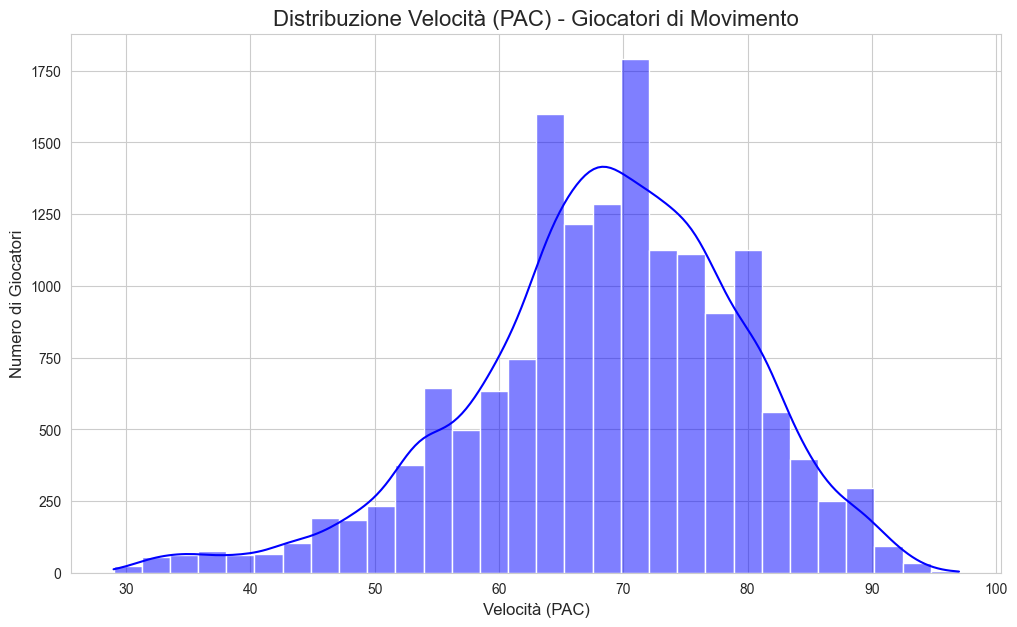

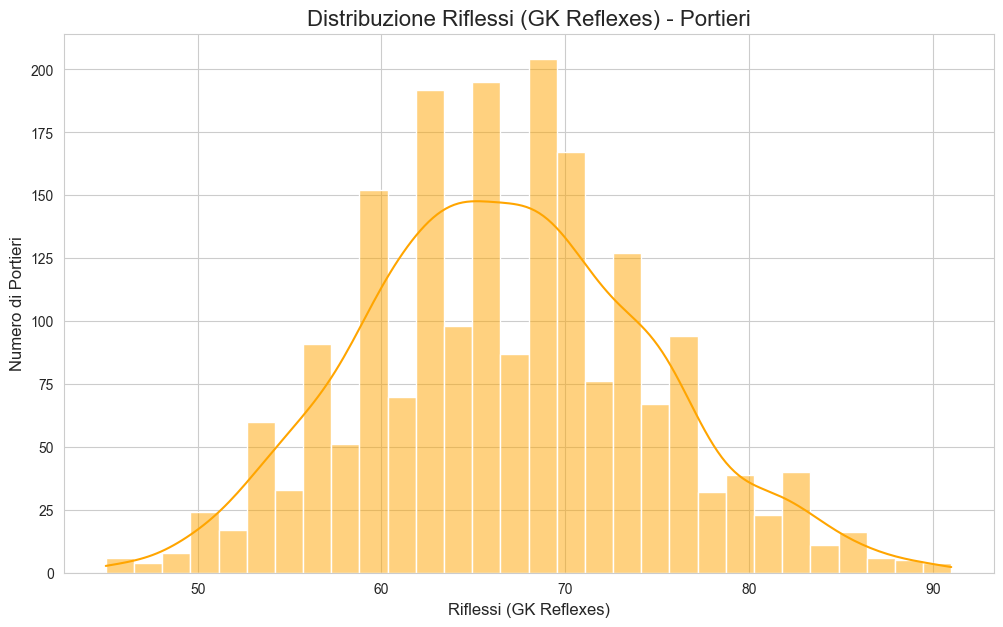

In [3]:
# --- CELLA 3: ISTOGRAMMI (PAC & GK REFLEXES) ---

print("Visualizzazione grafici distribuzione PAC e Riflessi...")

# Grafico 1: Distribuzione Velocità (PAC) - Giocatori di Movimento
plt.figure() # Crea una nuova figura
sns.histplot(df_movimento['PAC'], kde=True, bins=30, color='blue') 
plt.title('Distribuzione Velocità (PAC) - Giocatori di Movimento', fontsize=16)
plt.xlabel('Velocità (PAC)', fontsize=12)
plt.ylabel('Numero di Giocatori', fontsize=12)
plt.show()

# Grafico 2: Distribuzione Riflessi (GK Reflexes) - Portieri
plt.figure() # Crea una nuova figura
sns.histplot(df_portieri['GK Reflexes'], kde=True, bins=30, color='orange')
plt.title('Distribuzione Riflessi (GK Reflexes) - Portieri', fontsize=16)
plt.xlabel('Riflessi (GK Reflexes)', fontsize=12)
plt.ylabel('Numero di Portieri', fontsize=12)
plt.show()

Visualizzazione grafici distribuzione Tiro, Difesa e Rinvio...


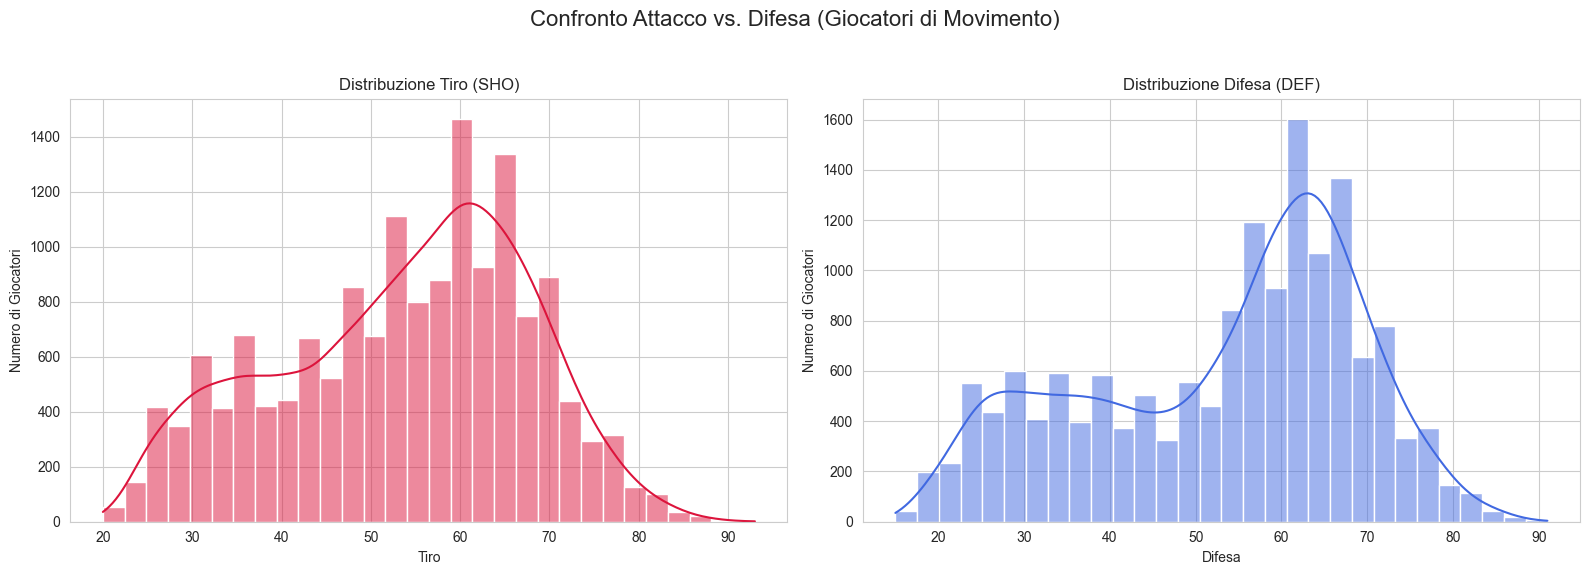

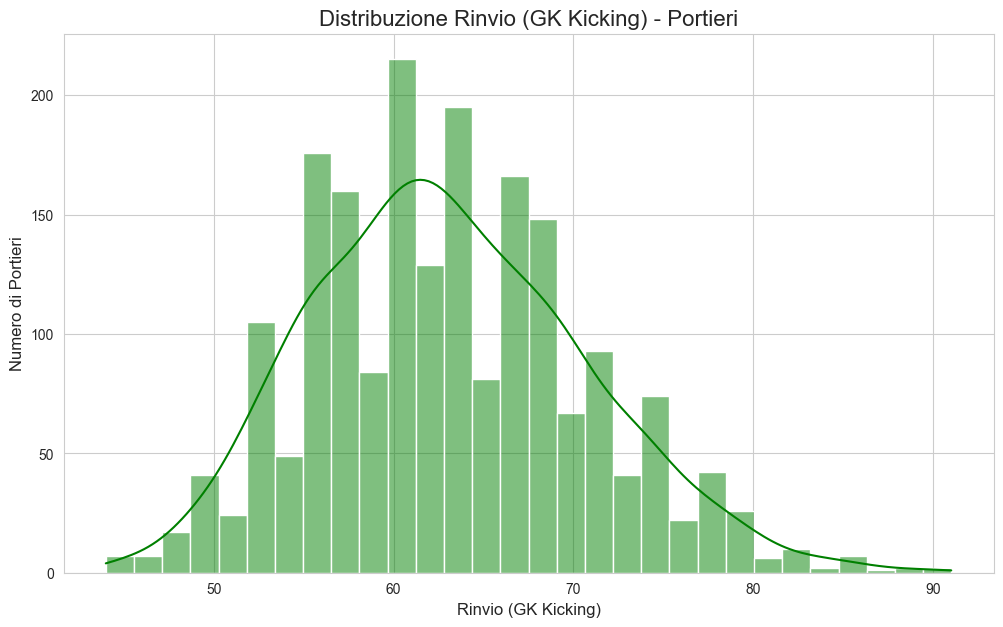

In [4]:
# --- CELLA 4: ISTOGRAMMI (SHO, DEF & GK KICKING) ---

print("Visualizzazione grafici distribuzione Tiro, Difesa e Rinvio...")

# Grafico 3 & 4: Confronto Tiro vs. Difesa (Giocatori di Movimento)
# Usiamo i subplots per metterli fianco a fianco
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # 1 riga, 2 colonne
fig.suptitle('Confronto Attacco vs. Difesa (Giocatori di Movimento)', fontsize=16)

# Grafico 3: Tiro (SHO)
sns.histplot(df_movimento['SHO'], kde=True, bins=30, ax=axes[0], color='crimson')
axes[0].set_title('Distribuzione Tiro (SHO)')
axes[0].set_xlabel('Tiro')
axes[0].set_ylabel('Numero di Giocatori')

# Grafico 4: Difesa (DEF)
sns.histplot(df_movimento['DEF'], kde=True, bins=30, ax=axes[1], color='royalblue')
axes[1].set_title('Distribuzione Difesa (DEF)')
axes[1].set_xlabel('Difesa')
axes[1].set_ylabel('Numero di Giocatori')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Aggiusta la spaziatura per il titolo
plt.show()

# Grafico 5: Distribuzione Rinvio (GK Kicking) - Portieri
plt.figure() # Nuova figura
sns.histplot(df_portieri['GK Kicking'], kde=True, bins=30, color='green')
plt.title('Distribuzione Rinvio (GK Kicking) - Portieri', fontsize=16)
plt.xlabel('Rinvio (GK Kicking)', fontsize=12)
plt.ylabel('Numero di Portieri', fontsize=12)
plt.show()

### SKILL E PIEDE DEBOLE

Visualizzazione grafici Skill Moves e Piede Debole...


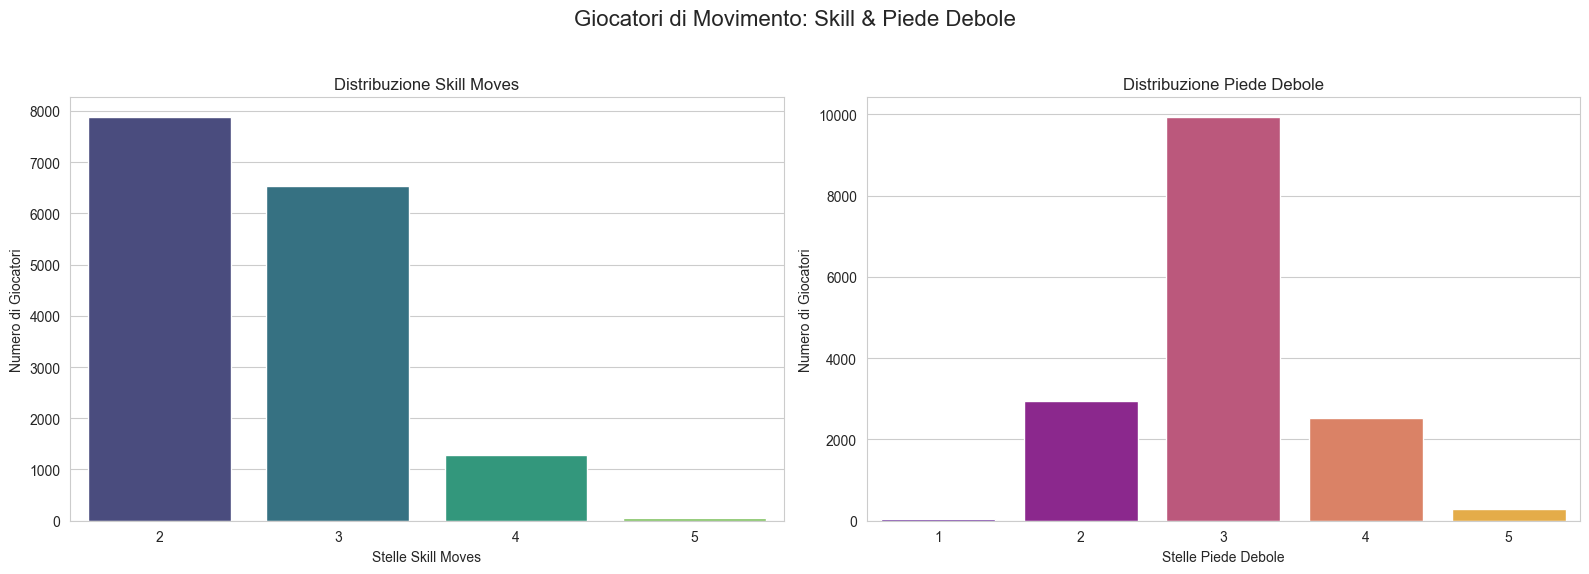

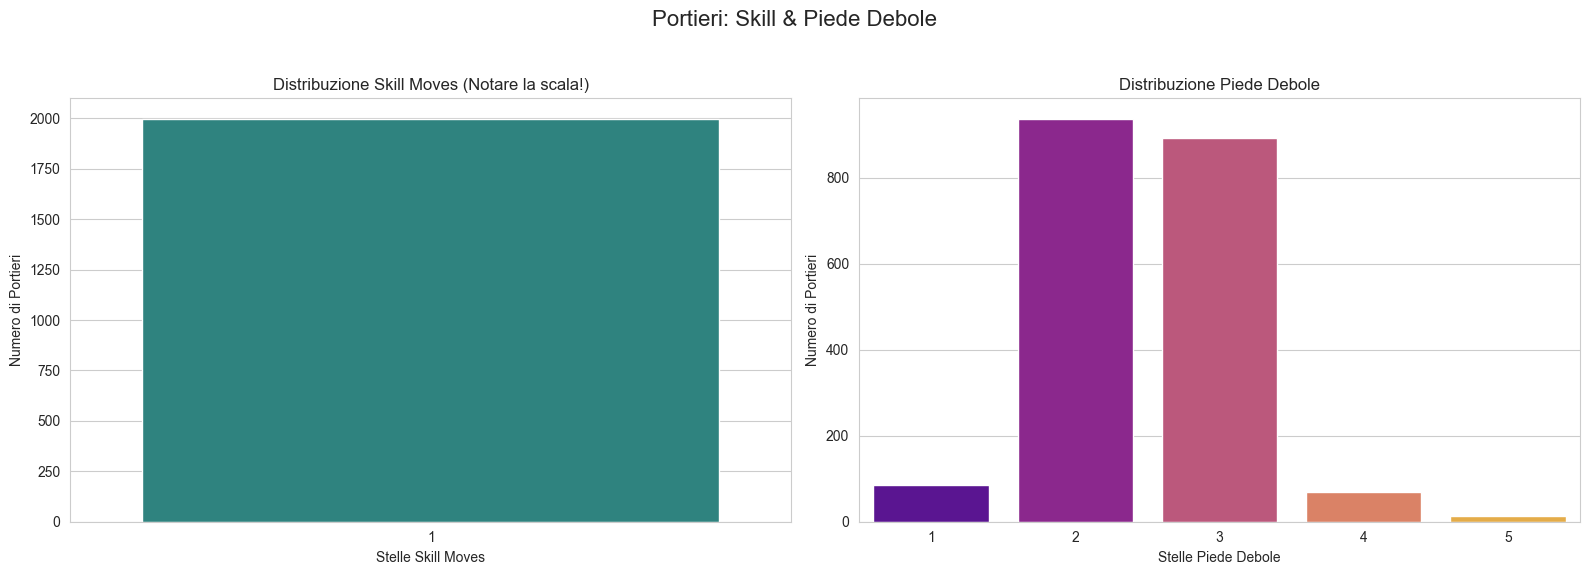

In [5]:
# --- CELLA 5: GRAFICI A BARRE (SKILL MOVES & WEAK FOOT) ---

print("Visualizzazione grafici Skill Moves e Piede Debole...")

# Grafico 6 & 7: Giocatori di Movimento
fig_mov, axes_mov = plt.subplots(1, 2, figsize=(16, 6))
fig_mov.suptitle('Giocatori di Movimento: Skill & Piede Debole', fontsize=16)

sns.countplot(data=df_movimento, x='Skill moves', ax=axes_mov[0], palette='viridis')
axes_mov[0].set_title('Distribuzione Skill Moves')
axes_mov[0].set_xlabel('Stelle Skill Moves')
axes_mov[0].set_ylabel('Numero di Giocatori')

sns.countplot(data=df_movimento, x='Weak foot', ax=axes_mov[1], palette='plasma')
axes_mov[1].set_title('Distribuzione Piede Debole')
axes_mov[1].set_xlabel('Stelle Piede Debole')
axes_mov[1].set_ylabel('Numero di Giocatori')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Grafico 8 & 9: Portieri
fig_gk, axes_gk = plt.subplots(1, 2, figsize=(16, 6))
fig_gk.suptitle('Portieri: Skill & Piede Debole', fontsize=16)

sns.countplot(data=df_portieri, x='Skill moves', ax=axes_gk[0], palette='viridis')
axes_gk[0].set_title('Distribuzione Skill Moves (Notare la scala!)')
axes_gk[0].set_xlabel('Stelle Skill Moves')
axes_gk[0].set_ylabel('Numero di Portieri')

sns.countplot(data=df_portieri, x='Weak foot', ax=axes_gk[1], palette='plasma')
axes_gk[1].set_title('Distribuzione Piede Debole')
axes_gk[1].set_xlabel('Stelle Piede Debole')
axes_gk[1].set_ylabel('Numero di Portieri')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### MAPPA DI CORRELAZIONE (DIVISA PER RUOLO)

Generazione Matrici di Correlazione per Attaccanti e Difensori...
Trovati 3210 attaccanti.
Trovati 5922 difensori.


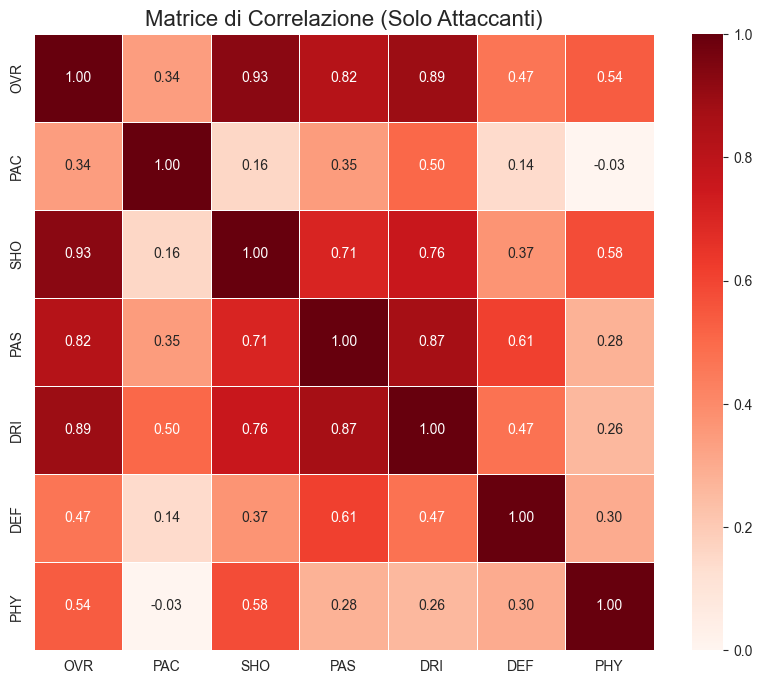

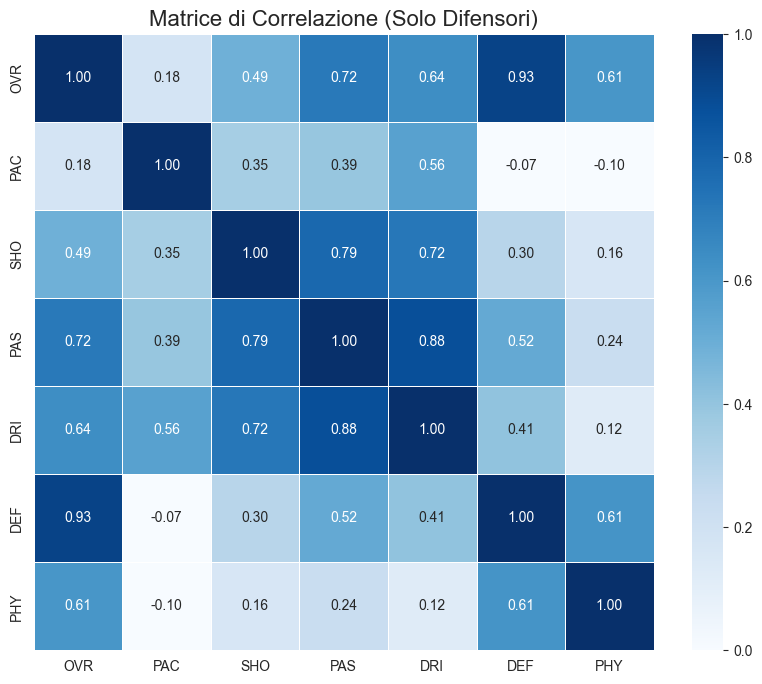

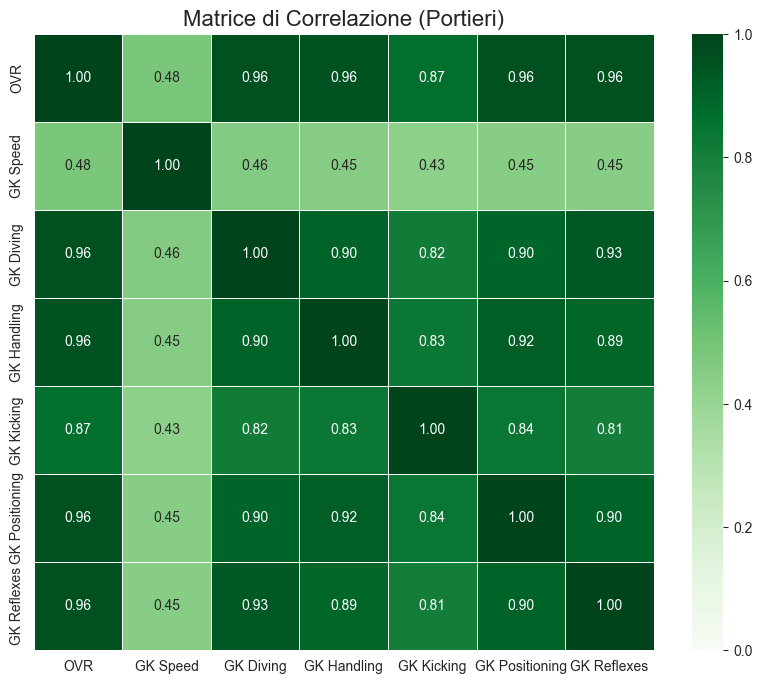

In [6]:
# --- CELLA 6: MATRICI DI CORRELAZIONE (PER RUOLO) ---

print("Generazione Matrici di Correlazione per Attaccanti e Difensori...")

# 1. Definiamo i macro-ruoli
attaccanti_list = ['ST', 'LW', 'RW', 'CF']
difensori_list = ['CB', 'LB', 'RB', 'LWB', 'RWB']
# Nota: i centrocampisti (CAM, CM, CDM...) li ignoriamo per questo confronto diretto

# 2. Filtriamo i DataFrame
df_attaccanti = df_movimento[df_movimento['Position'].isin(attaccanti_list)]
df_difensori = df_movimento[df_movimento['Position'].isin(difensori_list)]

print(f"Trovati {len(df_attaccanti)} attaccanti.")
print(f"Trovati {len(df_difensori)} difensori.")

# 3. Definiamo le statistiche da correlare
stats_corr = ['OVR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']

# 4. Heatmap solo Attaccanti
corr_matrix_att = df_attaccanti[stats_corr].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_att, annot=True, cmap='Reds', fmt='.2f', linewidths=.5, vmin=0, vmax=1)
plt.title('Matrice di Correlazione (Solo Attaccanti)', fontsize=16)
plt.show()

# 5. Heatmap solo Difensori
corr_matrix_def = df_difensori[stats_corr].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_def, annot=True, cmap='Blues', fmt='.2f', linewidths=.5, vmin=0, vmax=1)
plt.title('Matrice di Correlazione (Solo Difensori)', fontsize=16)
plt.show()

# 6. Heatmap Portieri (già che ci siamo, facciamo anche la loro)
stats_corr_gk = ['OVR', 'GK Speed', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']
corr_matrix_gk = df_portieri[stats_corr_gk].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_gk, annot=True, cmap='Greens', fmt='.2f', linewidths=.5, vmin=0, vmax=1)
plt.title('Matrice di Correlazione (Portieri)', fontsize=16)
plt.show()

### PLAYSTYLE

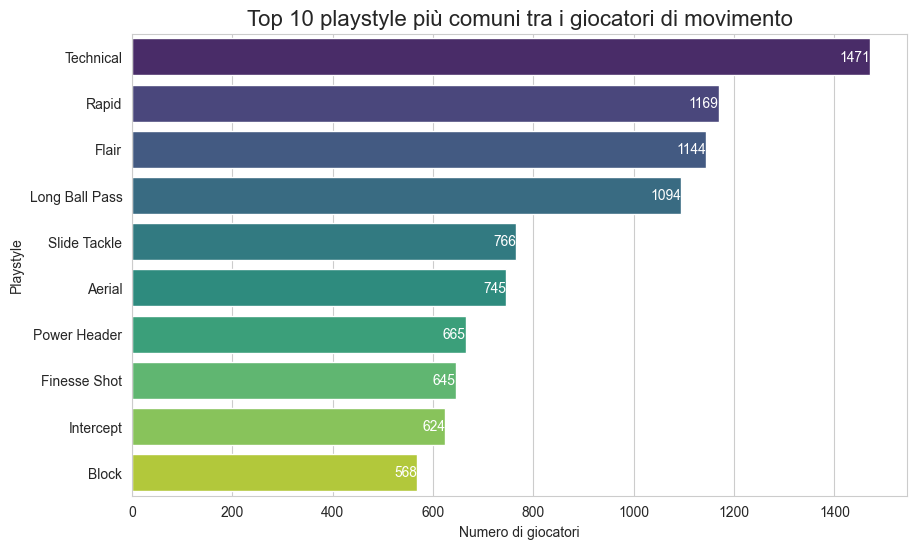

In [7]:
# Top 10 playing styles

playing_style = df_movimento['play style'].str.split(', ')
playing_style = playing_style.explode()
playing_style = playing_style.value_counts()
top_styles = playing_style.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_styles.values, y=top_styles.index, palette='viridis')
plt.title('Top 10 playstyle più comuni tra i giocatori di movimento', fontsize=16)
for x,y in enumerate(top_styles.values):
    plt.text(y, x, str(y), ha='right', color='white', va='center')
plt.xlabel('Numero di giocatori')
plt.ylabel('Playstyle')
plt.show()

### ANALISI ETA'

Visualizzazione confronto età Movimento vs. Portieri...


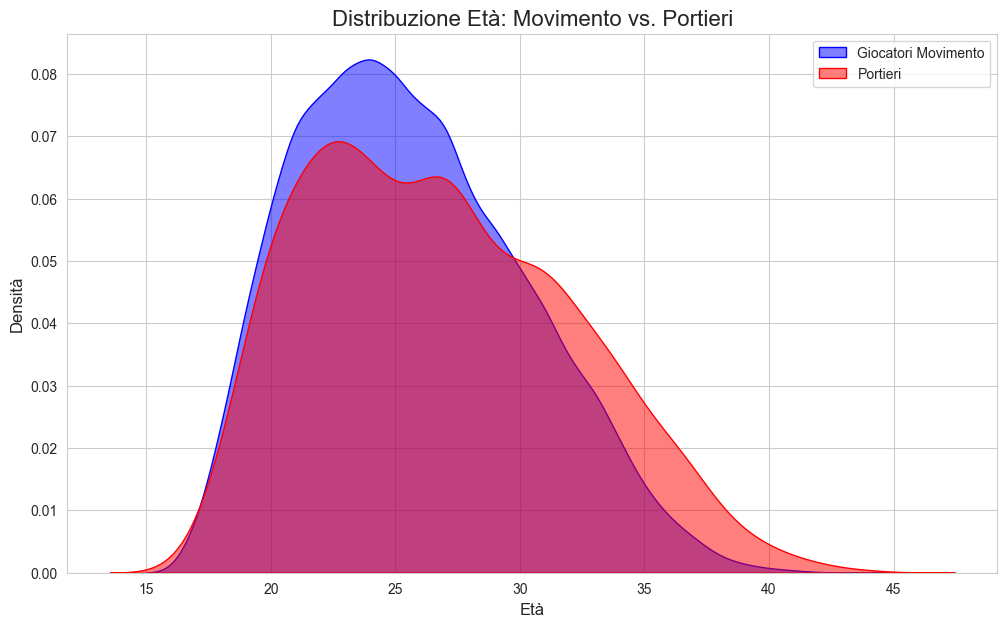

In [8]:
# --- CELLA 9: CONFRONTO DISTRIBUZIONE ETÀ (KDE PLOT) ---

print("Visualizzazione confronto età Movimento vs. Portieri...")

plt.figure(figsize=(12, 7))

# Disegniamo il primo grafico (Movimento)
# kdeplot crea un grafico a densità (stima della densità del kernel)
# 'fill=True' colora l'area sotto la curva
# 'label' è il testo che apparirà nella legenda
sns.kdeplot(df_movimento['Age'], label='Giocatori Movimento', fill=True, color='blue', alpha=0.5)

# Disegniamo il secondo grafico (Portieri) sullo STESSO grafico
sns.kdeplot(df_portieri['Age'], label='Portieri', fill=True, color='red', alpha=0.5)

plt.title('Distribuzione Età: Movimento vs. Portieri', fontsize=16)
plt.xlabel('Età', fontsize=12)
plt.ylabel('Densità', fontsize=12) # Y è 'Densità' non 'Conteggio'
plt.legend() # Mostra la legenda (fondamentale qui)
plt.show()

Visualizzazione confronto età (Istogrammi fianco a fianco)...


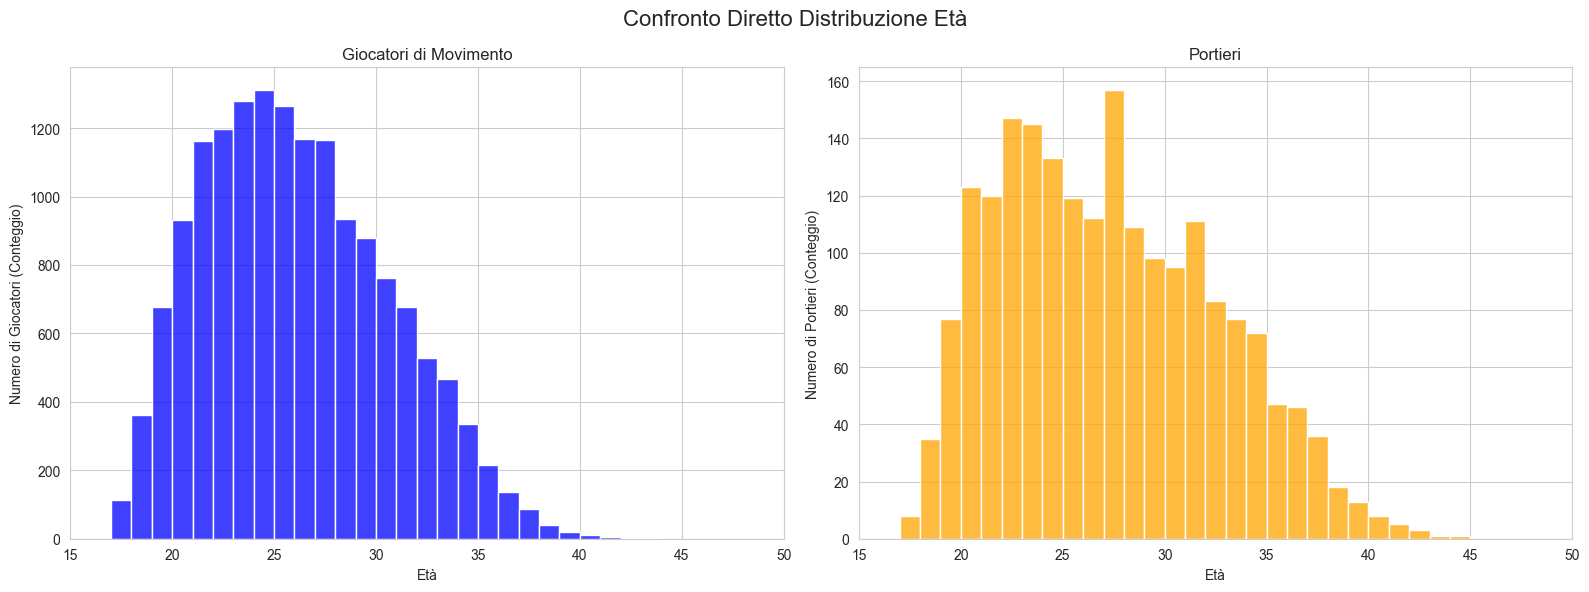

In [9]:
# --- CELLA 12: CONFRONTO ETÀ (Istogrammi Semplici Affiancati) ---

print("Visualizzazione confronto età (Istogrammi fianco a fianco)...")

# Creiamo una figura con 1 riga e 2 colonne
# sharey=False è fondamentale: le scale Y (conteggi) DEVONO essere diverse
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False) 
fig.suptitle('Confronto Diretto Distribuzione Età', fontsize=16)

# Assicuriamo che i "bins" (le barre) siano identici per un confronto onesto
# range(15, 50) crea barre per 15, 16, 17... fino a 49 anni
age_bins = range(15, 50)

# --- Grafico 1: Giocatori di Movimento ---
sns.histplot(df_movimento['Age'], bins=age_bins, kde=False, color='blue', ax=axes[0])
axes[0].set_title('Giocatori di Movimento')
axes[0].set_xlabel('Età')
axes[0].set_ylabel('Numero di Giocatori (Conteggio)')
axes[0].set_xlim(15, 50) # Fissiamo l'asse X (Età) per entrambi

# --- Grafico 2: Portieri ---
sns.histplot(df_portieri['Age'], bins=age_bins, kde=False, color='orange', ax=axes[1])
axes[1].set_title('Portieri')
axes[1].set_xlabel('Età')
axes[1].set_ylabel('Numero di Portieri (Conteggio)')
axes[1].set_xlim(15, 50) # Fissiamo l'asse X (Età) per entrambi

plt.tight_layout() # Sistema la spaziatura
plt.show()

Visualizzazione confronto età (Grafico Impilato al 100%)...


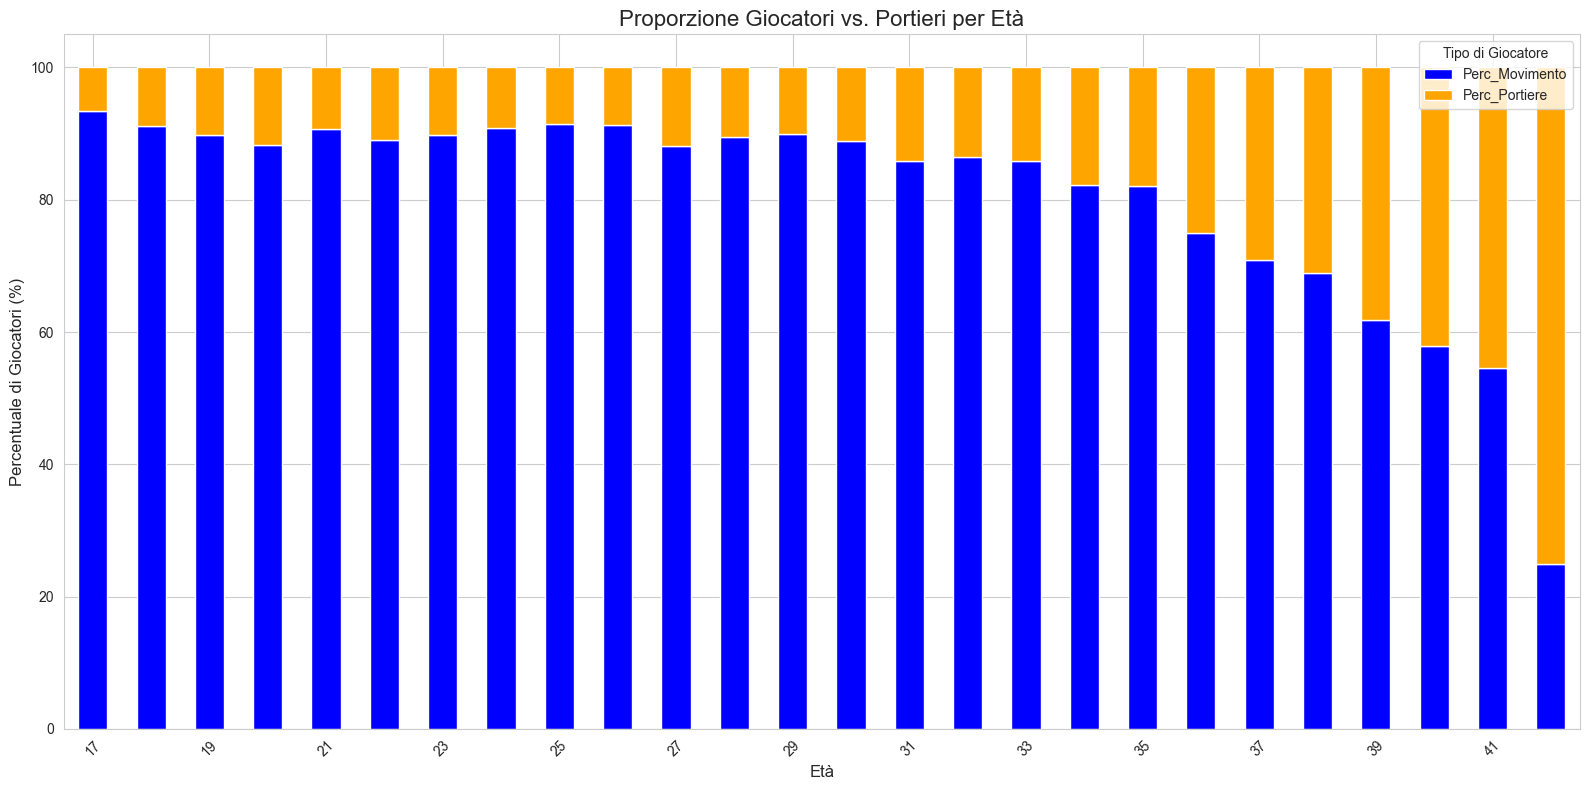

In [10]:
# --- CELLA 13: CONFRONTO ETÀ (Grafico Impilato al 100%) ---

print("Visualizzazione confronto età (Grafico Impilato al 100%)...")

# --- 1. Preparazione Dati ---

# Contiamo i giocatori per ogni età in ciascun gruppo
mov_age_counts = df_movimento['Age'].value_counts()
gk_age_counts = df_portieri['Age'].value_counts()

# Creiamo un nuovo DataFrame unendo questi conteggi
# L'indice (le righe) sarà l'Età.
df_age_dist = pd.DataFrame({
    'Movimento': mov_age_counts,
    'Portiere': gk_age_counts
})

# Riempiamo con 0 eventuali età mancanti (es. 40 anni con portieri ma 0 movimento)
df_age_dist = df_age_dist.fillna(0)

# Ordiniamo per età (indice)
df_age_dist = df_age_dist.sort_index()

# Filtriamo per un range di età sensato (es. da 17 a 42 anni)
# per rimuovere gli outlier estremi che hanno pochi giocatori
df_age_dist = df_age_dist.loc[17:42] 

# --- 2. Calcolo Percentuali ---

# Calcoliamo il totale per ogni riga (età)
df_age_dist['Totale'] = df_age_dist['Movimento'] + df_age_dist['Portiere']

# Calcoliamo le percentuali
df_age_dist['Perc_Movimento'] = (df_age_dist['Movimento'] / df_age_dist['Totale']) * 100
df_age_dist['Perc_Portiere'] = (df_age_dist['Portiere'] / df_age_dist['Totale']) * 100

# --- 3. Creazione Grafico ---

# Selezioniamo solo le due colonne percentuali per il grafico
df_to_plot = df_age_dist[['Perc_Movimento', 'Perc_Portiere']]

# Creiamo il grafico a barre impilate
# kind='bar', stacked=True
df_to_plot.plot(kind='bar', stacked=True, figsize=(16, 8), color=['blue', 'orange'])

plt.title('Proporzione Giocatori vs. Portieri per Età', fontsize=16)
plt.xlabel('Età', fontsize=12)
plt.ylabel('Percentuale di Giocatori (%)', fontsize=12)
plt.legend(title='Tipo di Giocatore')

# Miglioriamo la leggibilità dell'asse X
# Mostriamo solo un'etichetta ogni 2 anni
plt.xticks(ticks=range(0, len(df_to_plot.index), 2), 
           labels=df_to_plot.index[::2], 
           rotation=45)

plt.tight_layout()
plt.show()

Visualizzazione confronto età (Grafico Impilato - Conteggi Assoluti)...


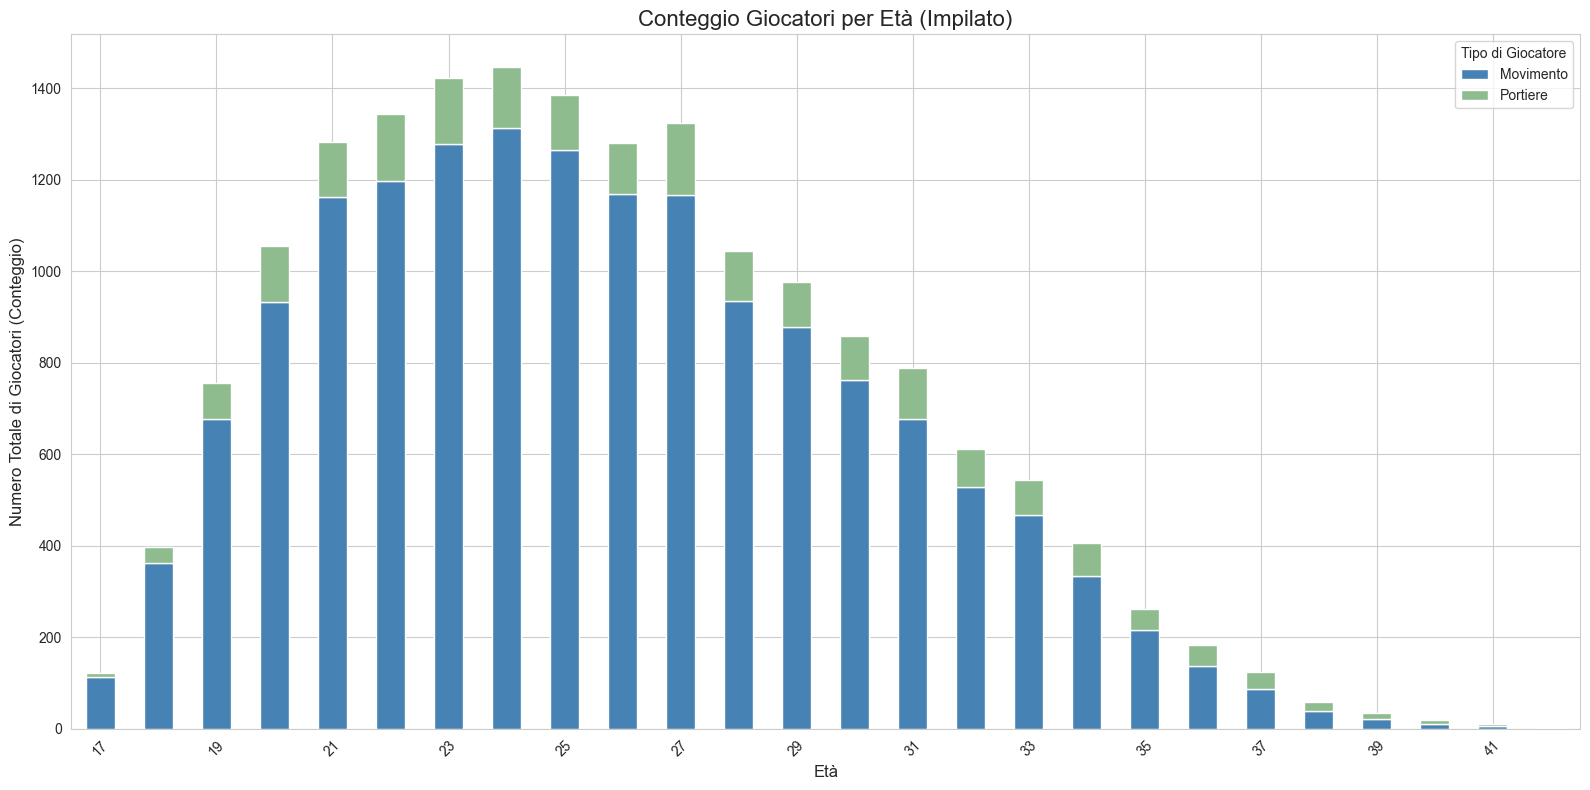

In [11]:
# --- CELLA 14: CONFRONTO ETÀ (Grafico Impilato - Conteggi Assoluti) ---

print("Visualizzazione confronto età (Grafico Impilato - Conteggi Assoluti)...")

# --- 1. Preparazione Dati ---
# Riutilizziamo il DataFrame 'df_age_dist' della Cella 13, 
# che contiene già i conteggi per età.

# Assicuriamoci che esista, in caso non avessi eseguito la cella 13
try:
    df_age_dist
except NameError:
    print("Creazione DataFrame conteggi per età...")
    mov_age_counts = df_movimento['Age'].value_counts()
    gk_age_counts = df_portieri['Age'].value_counts()
    
    df_age_dist = pd.DataFrame({
        'Movimento': mov_age_counts,
        'Portiere': gk_age_counts
    })
    df_age_dist = df_age_dist.fillna(0).sort_index()
    df_age_dist = df_age_dist.loc[14:50] # Filtriamo per un range sensato

# --- 2. Creazione Grafico ---

# Selezioniamo solo le due colonne di CONTEGGIO
df_to_plot = df_age_dist[['Movimento', 'Portiere']]

# Definiamo colori più sobri
colori_sobri = ['steelblue', 'darkseagreen'] 

# Creiamo il grafico a barre impilate (stacked=True)
# Le barre ora avranno altezze diverse
df_to_plot.plot(kind='bar', stacked=True, figsize=(16, 8), color=colori_sobri)

plt.title('Conteggio Giocatori per Età (Impilato)', fontsize=16)
plt.xlabel('Età', fontsize=12)
plt.ylabel('Numero Totale di Giocatori (Conteggio)', fontsize=12)
plt.legend(title='Tipo di Giocatore')

# Miglioriamo la leggibilità dell'asse X (etichette ogni 2 anni)
plt.xticks(ticks=range(0, len(df_to_plot.index), 2), 
           labels=df_to_plot.index[::2], 
           rotation=45)

plt.tight_layout()
plt.show()

### PROBLEMI GRAFICO PORTIERI ED ETA'
I portieri sono in numero molto minore rispetto ai giocatori di movimento, per cui è controproducente andare a mettere iniseme gk e tutti gli altri ruoli. ha molto più senso confrontare, in percentuale, il numero dei portieri rapportato a quello dei giocatori di movimento sulla base dell'etè.

Visualizzazione proporzione di portieri all'aumentare dell'età...


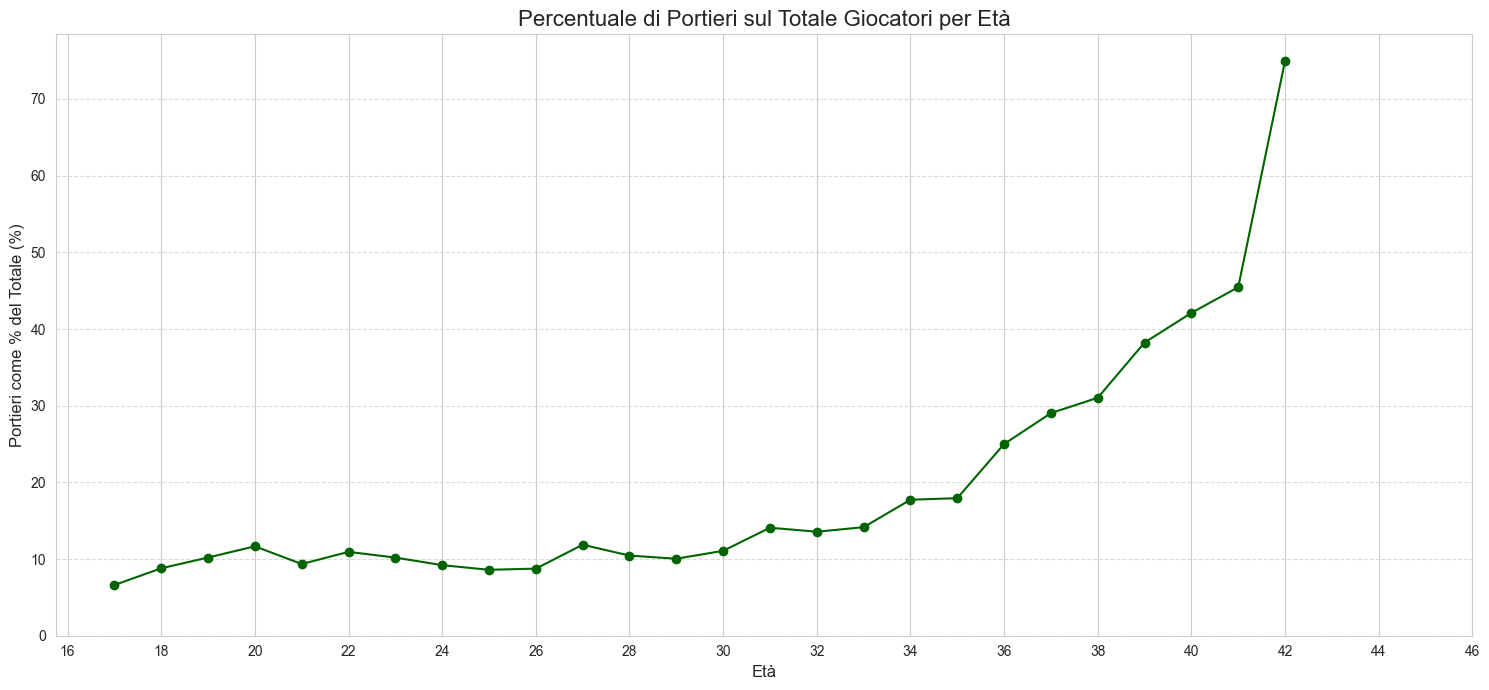

In [12]:
# --- CELLA 15: PROPORZIONE PORTIERI PER ETÀ (Grafico a Linea) ---

print("Visualizzazione proporzione di portieri all'aumentare dell'età...")

# --- 1. Preparazione Dati ---
# Riutilizziamo i dati delle celle precedenti. 
# Assicuriamoci che esista il DataFrame con i conteggi.
try:
    # df_age_dist deve contenere i conteggi 'Movimento' e 'Portiere'
    df_age_dist
except NameError:
    print("Creazione DataFrame conteggi per età...")
    mov_age_counts = df_movimento['Age'].value_counts()
    gk_age_counts = df_portieri['Age'].value_counts()
    
    df_age_dist = pd.DataFrame({
        'Movimento': mov_age_counts,
        'Portiere': gk_age_counts
    })
    df_age_dist = df_age_dist.fillna(0).sort_index()

# Filtriamo per il range che ci interessa
df_age_dist_filtered = df_age_dist.loc[16:46] 

# --- 2. Calcolo Percentuale (La nostra metrica chiave) ---
df_age_dist_filtered['Totale'] = df_age_dist_filtered['Movimento'] + df_age_dist_filtered['Portiere']
df_age_dist_filtered['Perc_Portiere'] = (df_age_dist_filtered['Portiere'] / df_age_dist_filtered['Totale']) * 100

# --- 3. Creazione Grafico a Linea ---
plt.figure(figsize=(15, 7))

# Usiamo plot() per un grafico a linea
# x = l'indice (Età), y = la colonna della percentuale
plt.plot(df_age_dist_filtered.index, 
         df_age_dist_filtered['Perc_Portiere'], 
         marker='o', # Aggiunge un pallino su ogni punto dati
         linestyle='-', # Linea continua
         color='darkgreen') # Un colore sobrio

plt.title('Percentuale di Portieri sul Totale Giocatori per Età', fontsize=16)
plt.xlabel('Età', fontsize=12)
plt.ylabel('Portieri come % del Totale (%)', fontsize=12)

# Aggiungiamo una griglia solo sull'asse Y per facilitare la lettura
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Assicuriamoci che l'asse X mostri le etichette per ogni età (o quasi)
plt.xticks(ticks=range(16, 47, 2)) # Etichetta ogni 2 anni
plt.ylim(bottom=0) # Fai partire l'asse Y da 0

plt.tight_layout()
plt.show()

SI POTREBBE FARE CONFRONTO CON QUELLA DEI GIOCATORI DI MOVIMENTI


### CAMPIONATI E NAZIONALITA' PIU' PRESENTI

Analisi Nazionalità e Campionati più presenti...


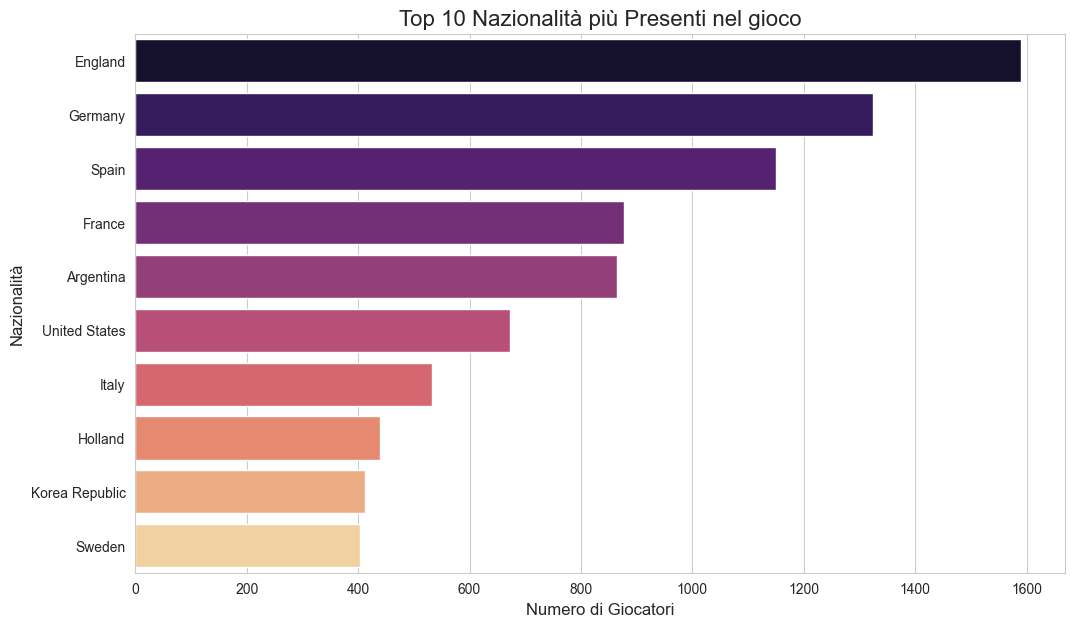

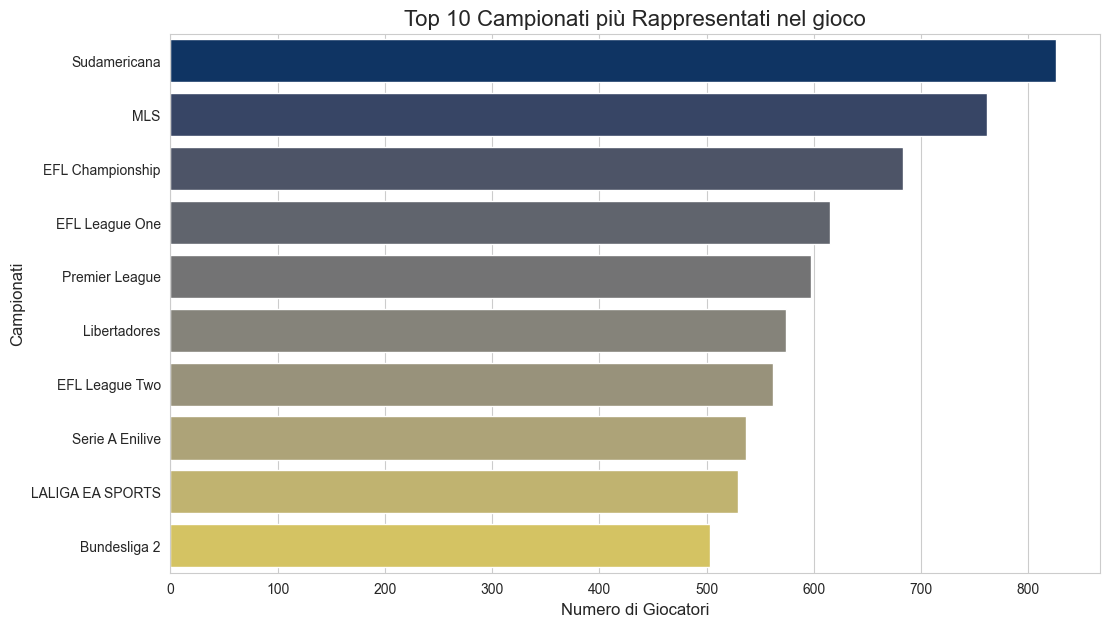

In [13]:
# --- CELLA 16: TOP 10 NAZIONALITÀ E CAMPIONATI ---

print("Analisi Nazionalità e Campionati più presenti...")

# --- 1. Preparazione Dati ---
# Uniamo temporaneamente le colonne 'Nation' e 'League'
# dai nostri due DataFrame puliti per avere il conteggio totale.

all_nations = pd.concat([df_movimento['Nation'], df_portieri['Nation']])
all_leagues = pd.concat([df_movimento['League'], df_portieri['League']])

# --- 2. Analisi Nazionalità ---
# Facciamo un value_counts() e prendiamo le prime 10

top_nations = all_nations.value_counts().head(10)

# Creiamo il grafico a barre orizzontali
plt.figure(figsize=(12, 7))

# Nota: y=index, x=values per il grafico orizzontale

sns.barplot(x=top_nations.values, y=top_nations.index, palette='magma')
plt.title('Top 10 Nazionalità più Presenti nel gioco', fontsize=16)
plt.xlabel('Numero di Giocatori', fontsize=12)
plt.ylabel('Nazionalità', fontsize=12)
plt.show()

# --- 3. Analisi Campionati ---
# Facciamo un value_counts() e prendiamo le prime 10

top_leagues = all_leagues.value_counts().head(10)

# Creiamo il grafico a barre orizzontali
plt.figure(figsize=(12, 7))

sns.barplot(x=top_leagues.values, y=top_leagues.index, palette='cividis')
plt.title('Top 10 Campionati più Rappresentati nel gioco', fontsize=16)
plt.xlabel('Numero di Giocatori', fontsize=12)
plt.ylabel('Campionati', fontsize=12)
plt.show()

### CONFRONTO TRA GIOCATORI

In [14]:
# mi serviva per vedere come fossero scritti i nomi dei giocatori

df_movimento.head()

,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,...,Skill moves,Preferred foot,Height,Weight,Alternative positions,Age,Nation,League,Team,play style
0,Kylian Mbappé,91,97,90,80,92,36,78,97,97,...,5,Right,"182cm / 6'0""",75kg / 165lb,LW,25,France,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R..."
1,Rodri,91,66,80,86,84,87,85,65,66,...,3,Right,"191cm / 6'3""",82kg / 181lb,CM,28,Spain,Premier League,Manchester City,"Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P..."
2,Erling Haaland,91,88,92,70,81,45,88,80,94,...,3,Left,"195cm / 6'5""",94kg / 207lb,NaN,24,Norway,Premier League,Manchester City,"Acrobatic+, Bruiser, Power Header, Power Shot,..."
3,Jude Bellingham,90,80,87,83,88,78,83,81,80,...,4,Right,"186cm / 6'1""",75kg / 165lb,CM,21,England,LALIGA EA SPORTS,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T..."
4,Vini Jr.,90,95,84,81,91,29,69,95,95,...,5,Right,"176cm / 5'9""",73kg / 161lb,"ST, LM",24,Brazil,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To..."


In [15]:
# --- CELLA 17: ESTRAZIONE DATI PER CONFRONTO ---

import numpy as np # Ci servirà per il grafico radar

# Nomi esatti (sensibile alle maiuscole/minuscole/accenti!)
# ATTENZIONE: i nomi nel tuo dataset potrebbero essere diversi
# (es. "K. Mbappé", "E. Haaland"). Dovrai controllare
player_1_name = "Kylian Mbappé" 
player_2_name = "Erling Haaland"

# Troviamo i dati dei giocatori
try:
    player_1_stats = df_movimento[df_movimento['Name'].str.contains(player_1_name, case=False)].iloc[0]
    player_2_stats = df_movimento[df_movimento['Name'].str.contains(player_2_name, case=False)].iloc[0]
    
    print(f"--- Dati Trovati ---")
    print(f"Giocatore 1: {player_1_stats['Name']} (OVR: {player_1_stats['OVR']})")
    print(f"Giocatore 2: {player_2_stats['Name']} (OVR: {player_2_stats['OVR']})")

except IndexError:
    print(f"ERRORE: Impossibile trovare '{player_1_name}' o '{player_2_name}'.")
    print("Controlla l'ortografia esatta nel tuo CSV e modifica le variabili.")
    # In caso di errore, potresti voler interrompere l'esecuzione
    # raise SystemExit("Stop alla cella.")

--- Dati Trovati ---
Giocatore 1: Kylian Mbappé (OVR: 91)
Giocatore 2: Erling Haaland (OVR: 91)


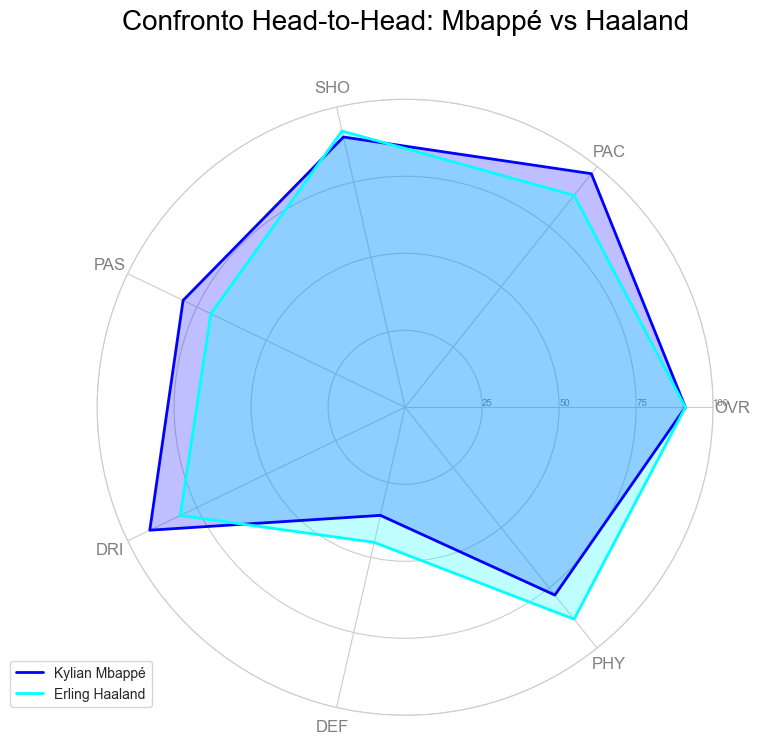

In [16]:
# --- CELLA 19: GRAFICO RADAR (CONFRONTO STATS BASE) ---

# 1. Definiamo le categorie (le 6 stats base)
categories = ['OVR' ,'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']
N = len(categories)

# 2. Prepariamo i valori per il Giocatore 1 (Mbappé)
values_p1 = player_1_stats[categories].values.flatten().tolist()
values_p1 += values_p1[:1] # Chiudiamo il cerchio (aggiungiamo il primo valore alla fine)

# 3. Prepariamo i valori per il Giocatore 2 (Haaland)
values_p2 = player_2_stats[categories].values.flatten().tolist()
values_p2 += values_p2[:1] # Chiudiamo il cerchio

# 4. Calcoliamo gli angoli per ogni asse
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1] # Chiudiamo il cerchio

# 5. Creazione del Grafico
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 6. Disegniamo gli assi
plt.xticks(angles[:-1], categories, color='grey', size=12)

# 7. Disegniamo i "livelli" (es. 25, 50, 75, 100)
ax.set_rlabel_position(0)
plt.yticks([25, 50, 75, 100], ["25", "50", "75", "100"], color="grey", size=7)
plt.ylim(0, 100) # Assicuriamoci che la scala sia 0-100

# 8. Disegniamo il poligono del Giocatore 1 (Mbappé)
ax.plot(angles, values_p1, linewidth=2, linestyle='solid', label=player_1_stats['Name'], color='blue')
ax.fill(angles, values_p1, 'blue', alpha=0.25)

# 9. Disegniamo il poligono del Giocatore 2 (Haaland)
ax.plot(angles, values_p2, linewidth=2, linestyle='solid', label=player_2_stats['Name'], color='cyan')
ax.fill(angles, values_p2, 'cyan', alpha=0.25)

# 10. Aggiungiamo titolo e legenda
plt.title('Confronto Head-to-Head: Mbappé vs Haaland', size=20, color='black', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()


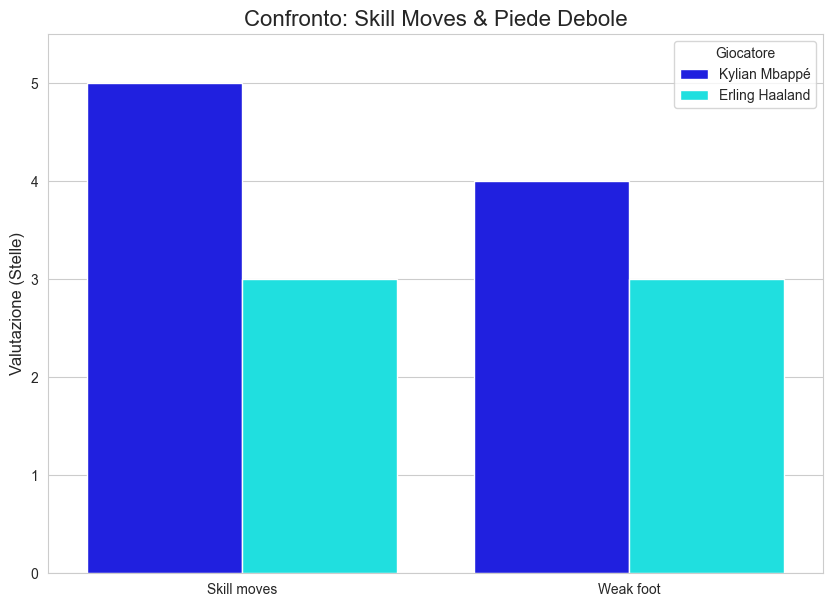

In [17]:
# --- CELLA 20: Confronto Skill/Piede Debole (Grafico a Barre Raggruppato) ---

# 1. Estrarre i dati che ci servono in un unico DataFrame
df_compare_stars = pd.DataFrame([
    player_1_stats[['Name', 'Skill moves', 'Weak foot']],
    player_2_stats[['Name', 'Skill moves', 'Weak foot']]
])

# 2. Riformattare i Dati (da "Largo" a "Lungo")
#    Questo è il passaggio chiave per il raggruppamento
#    Trasforma il DataFrame in un formato che Seaborn capisce
df_long = df_compare_stars.melt(id_vars=['Name'], 
                                value_vars=['Skill moves', 'Weak foot'], 
                                var_name='Statistica', 
                                value_name='Stelle')

# print("--- Dati in formato Lungo (per il grafico) ---")
# print(df_long.to_markdown(index=False))
# Output (esempio):
# | Name             | Statistica    | Stelle |
# |:-----------------|:--------------|:-------|
# | Kylian Mbappé    | Skill moves   | 5      |
# | Erling Haaland   | Skill moves   | 3      |
# | Kylian Mbappé    | Weak foot     | 4      |
# | Erling Haaland   | Weak foot     | 3      |


# 3. Creazione del Grafico
plt.figure(figsize=(10, 7))

# Usiamo sns.barplot()
# x='Statistica' -> Crea i due gruppi sull'asse X
# y='Stelle'     -> L'altezza della barra
# hue='Name'       -> Il colore (raggruppa le barre per giocatore)
sns.barplot(data=df_long, x='Statistica', y='Stelle', hue='Name', palette=['blue', 'cyan'])

plt.title('Confronto: Skill Moves & Piede Debole', fontsize=16)
plt.xlabel('') # L'etichetta 'Statistica' è già chiara
plt.ylabel('Valutazione (Stelle)', fontsize=12)

# Impostiamo l'asse Y per mostrare chiaramente la scala 1-5
plt.yticks(ticks=range(0, 6)) # Mostra etichette 0, 1, 2, 3, 4, 5
plt.ylim(0, 5.5) # Lascia un po' di spazio sopra il 5

plt.legend(title='Giocatore')
plt.show()

### CR7 VS MESSI

In [22]:
# --- CELLA 21: ESTRAZIONE DATI PER CONFRONTO (Ronaldo vs. Messi) ---

# Nomi esatti (sensibile alle maiuscole/minuscole/accenti!)
player_3_name = "Cristiano Ronaldo"
player_4_name = "Lionel Messi"

# Troviamo i dati dei giocatori
try:
    player_3_stats = df_movimento[df_movimento['Name'].str.contains(player_1_name, case=False)].iloc[0]
    player_4_stats = df_movimento[df_movimento['Name'].str.contains(player_2_name, case=False)].iloc[0]
    
    print(f"--- Dati Trovati ---")
    print(f"Giocatore 1: {player_3_stats['Name']} (OVR: {player_3_stats['OVR']})")
    print(f"Giocatore 2: {player_4_stats['Name']} (OVR: {player_4_stats['OVR']})")
except IndexError:
    print(f"ERRORE: Impossibile trovare '{player_3_name}' o '{player_4_name}'.")
    print("Controlla l'ortografia esatta nel tuo CSV e modifica le variabili.")
    
# In caso di errore, potresti voler interrompere l'esecuzione
# raise SystemExit("Stop alla cella.")

--- Dati Trovati ---
Giocatore 1: Cristiano Ronaldo (OVR: 86)
Giocatore 2: Lionel Messi (OVR: 88)


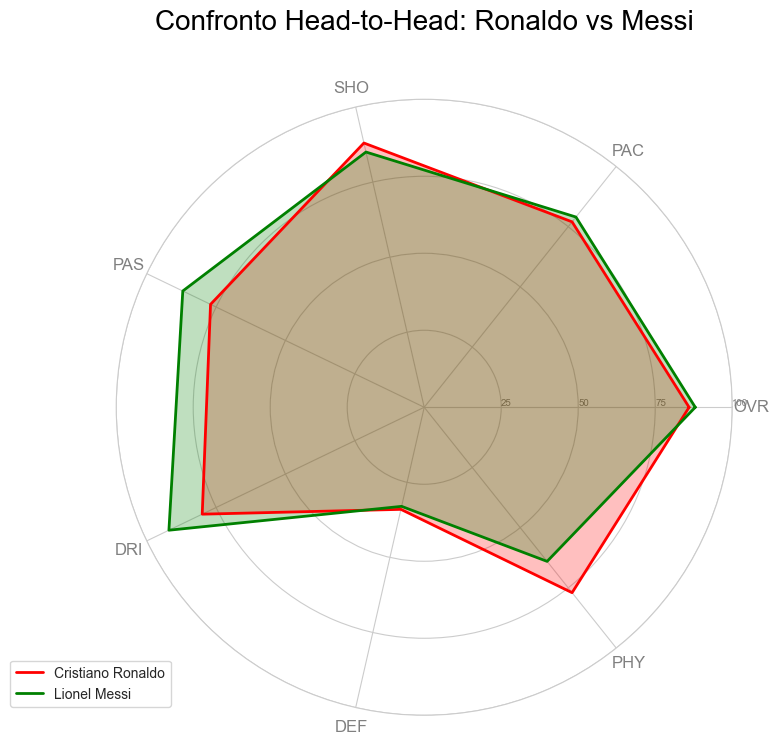

In [23]:
# --- CELLA 22: GRAFICO RADAR (CONFRONTO STATS BASE) ---

categories = ['OVR' ,'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']
N = len(categories)

# 2. Prepariamo i valori per il Giocatore 1 (Ronaldo)
values_p3 = player_3_stats[categories].values.flatten().tolist()
values_p3 += values_p3[:1] # Chiudiamo il cerchio 

# 3. Prepariamo i valori per il Giocatore 2 (Messi)
values_p4 = player_4_stats[categories].values.flatten().tolist()
values_p4 += values_p4[:1] # Chiudiamo il cerchio   

# 4. Calcoliamo gli angoli per ogni asse
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1] # Chiudiamo il cerchio

# 5. Creazione del Grafico
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 6. Disegniamo gli assi
plt.xticks(angles[:-1], categories, color='grey', size=12)

# 7. Disegniamo i "livelli" (es. 25, 50, 75, 100)
ax.set_rlabel_position(0)
plt.yticks([25, 50, 75, 100], ["25", "50", "75", "100"], color="grey", size=7)
plt.ylim(0, 100) # Assicuriamoci che la scala sia 0-100

# 8. Disegniamo il poligono del Giocatore 1 (Ronaldo)
ax.plot(angles, values_p3, linewidth=2, linestyle='solid', label=player_3_stats['Name'], color='red')
ax.fill(angles, values_p3, 'red', alpha=0.25)   

# 9. Disegniamo il poligono del Giocatore 2 (Messi)
ax.plot(angles, values_p4, linewidth=2, linestyle='solid', label=player_4_stats['Name'], color='green')
ax.fill(angles, values_p4, 'green', alpha=0.25)

# 10. Aggiungiamo titolo e legenda
plt.title('Confronto Head-to-Head: Ronaldo vs Messi', size=20, color='black', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))   

plt.show()


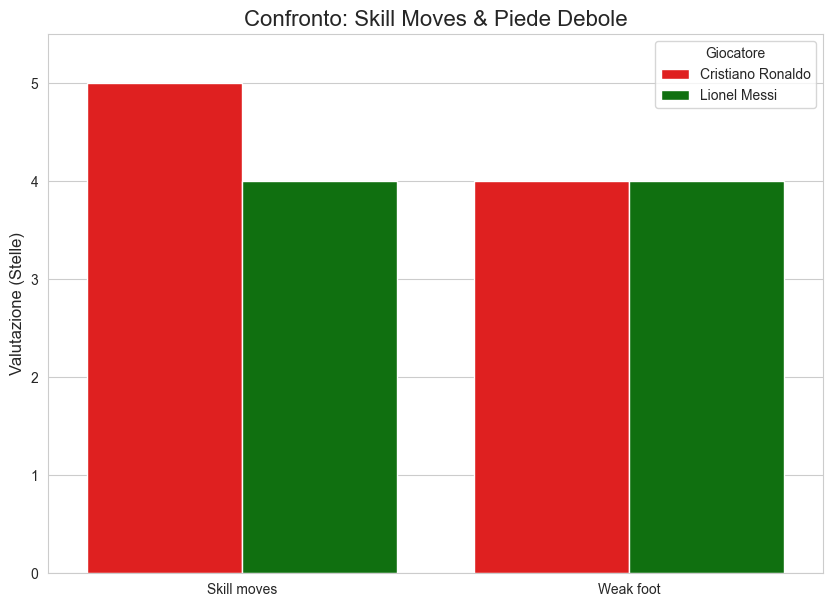

In [24]:
# --- CELLA 20: Confronto Skill/Piede Debole (Grafico a Barre Raggruppato) ---

df_compare_stars = pd.DataFrame([
    player_3_stats[['Name', 'Skill moves', 'Weak foot']],
    player_4_stats[['Name', 'Skill moves', 'Weak foot']]
])

# 2. Riformattare i Dati (da "Largo" a "Lungo")
df_long2 = df_compare_stars.melt(id_vars='Name',
                                 value_vars=['Skill moves', 'Weak foot'],
                                 var_name='Statistica',
                                 value_name='Stelle')

# 3. Creazione del Grafico
plt.figure(figsize=(10,7))
sns.barplot(data=df_long2, x='Statistica', y='Stelle', hue='Name', palette=['red', 'green'])
plt.title('Confronto: Skill Moves & Piede Debole', fontsize=16)
plt.xlabel('') # L'etichetta 'Statistica' è già chiara
plt.ylabel('Valutazione (Stelle)', fontsize=12) 
plt.yticks(ticks=range(0, 6)) # Mostra etichette 0, 1, 2, 3, 4, 5
plt.ylim(0, 5.5) # Lascia un po' di spazio sopra il 5
plt.legend(title='Giocatore')
plt.show()